In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [11]:
# Load in the data using pandas read_csv function as a dataframe
train_data = pd.read_csv('training.csv')


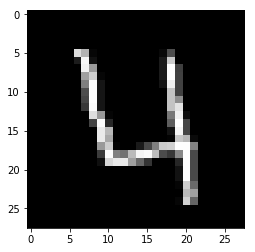

In [44]:
# For convolutional neural networks, the labels need to be one hot-encoded
# The pixel values for the black-and-white images range from 0 to 255
# so the values need to be scaled between 0 and 1 as floats.
# Additionally, the Conv2D layer requires a 3-D image as input because it deals with color images
# The images in this dataset are black-and-white 2-D images, but can be converted to a pseudo 3-D 
# image by adding a third dimension of 1
labelsData = train_data['label']
onehotData = keras.utils.to_categorical(labelsData, 10)
# Convert pandas data frame to numpy array
imgData = train_data.drop(['label'], axis=1).values
# Reshape into a 21000x28x28x1 matrix
imgData = imgData.reshape(21000, 28, 28, 1)
# Rescale pixel values
imgData = imgData / 255.0
# Sample image
plt.imshow(imgData[0].reshape(28, 28), cmap='gray')

In [46]:
smpSize = (28, 28, 1)

In [118]:
# Function to create model, required for KerasClassifier
def create_model(Conv2D_size, kernel_size_conv, activation_func, pool_size_conv):
    model = Sequential()
    model.add(Conv2D(Conv2D_size, kernel_size=kernel_size_conv, activation=activation_func, input_shape=smpSize))
    model.add(MaxPooling2D(pool_size=pool_size_conv))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), 
             metrics=['accuracy'])
    return model

#model.fit(imgData[:10000], onehotData[:10000], validation_data=(imgData[10000:], onehotData[10000:]), batch_size=128, epochs=3, verbose=1)

In [121]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(1)
model = KerasClassifier(build_fn=create_model, batch_size=128, epochs=3)
param_grid = dict(kernel_size_conv=[(3, 3), (6, 6), (2, 2), (12, 12)], epochs=[3, 6], Conv2D_size=[32, 64],
                 activation_func=['relu', 'tanh'], pool_size_conv=[(2,2), (4, 4)])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(imgData, onehotData, verbose=1)

C:\Users\Pramith\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/6
21000/21000 [==============================] - 59s 3ms/step - loss: 0.4293 - acc: 0.8748
Epoch 2/6
21000/21000 [==============================] - 70s 3ms/step - loss: 0.1353 - acc: 0.9607
Epoch 3/6
21000/21000 [==============================] - 71s 3ms/step - loss: 0.0915 - acc: 0.9730
Epoch 4/6
21000/21000 [==============================] - 74s 4ms/step - loss: 0.0692 - acc: 0.9799
Epoch 5/6
21000/21000 [==============================] - 71s 3ms/step - loss: 0.0587 - acc: 0.9822
Epoch 6/6
21000/21000 [==============================] - 76s 4ms/step - loss: 0.0489 - acc: 0.9863


In [122]:
pd.DataFrame(grid_result.cv_results_)

C:\Users\Pramith\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Pramith\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Pramith\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Pramith\Anaconda3\lib\site-packages\skle

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      220.307498      0.221953        15.686763        0.122996   
1      189.120104      3.359264        15.845209        0.354651   
2      281.462422      4.949427        22.143997        0.105160   
3      258.015838      0.198919        21.929181        0.144685   
4      182.965083      2.259866        12.585904        0.611224   
5      158.989128      2.193872        10.970759        0.520896   
6      361.134112      1.603547        25.660483        0.407363   
7      362.839985     10.196703        26.703555        0.416385   
8      409.119721     13.338193        17.047057        0.210427   
9      379.409705      0.903749        16.307535        0.339797   
10     548.788514      1.195527        21.752052        0.212521   
11     517.605790      2.528578        22.402178        0.527039   
12     360.737165      4.994061        12.379089        0.173817   
13     312.575431      1.082931        11.362369        0.538979   
14     717.338735      4.179781        26.090455        0.378687   
15     711.326482     15.180717        26.584805        0.743333   
16     200.107879      1.443651        17.429327        0.115346   
17     175.783004      1.263959        16.603411        0.310080   
18     276.174683      1.568020        23.394881        1.142999   
19     258.034184      1.149128        23.415231        0.869075   
20     180.356239      0.541795        14.100975        0.408601   
21     158.573831      1.291323        13.980557        1.013279   
22     364.431444      3.046096        26.804626        0.555134   
23     365.798410     10.833262        27.256947        1.324820   
24     403.100462     11.725472        18.903704        0.305763   
25     373.473839      2.024398        18.532775        1.987700   
26     552.840379      3.896523        23.563668        1.078536   
27     514.726421      3.293446        24.942307        1.632499   
28     353.736547      1.304323        14.427203        0.298366   
29     307.759692      1.225475        13.772407        0.529752   
..            ...           ...              ...             ...   
34     410.339916      4.335808        30.057594        1.080746   
35     371.750621      0.697880        28.364729        0.243709   
36     331.840057      3.365841        18.580811        0.259319   
37     287.181802      1.360327        16.471650        0.347522   
38     497.726728      2.410841        34.925704        0.230889   
39     492.676490      7.632658        34.961063        0.918370   
40     707.687243     16.244035        24.101380        0.943604   
41     626.528503      0.661923        21.820766        0.511095   
42     825.412514      6.525509        30.947224        0.201638   
43     745.378570      1.533515        28.578213        0.921289   
44     663.078355      3.773844        17.837284        0.555413   
45     585.537507      1.804864        16.621090        0.907930   
46     983.853919      3.174654        35.411382        0.995286   
47     978.576852     13.420917        35.474760        0.615231   
48     340.604589      1.116259        25.471017        0.657434   
49     291.451822      2.844889        24.400259        0.544901   
50     412.655887      1.193625        32.470968        1.110293   
51     375.002920      1.087999        31.148367        1.102375   
52     335.658424      1.021888        21.034546        0.259707   
53     291.752702      0.837502        20.247655        0.672930   
54     501.338284      1.204813        35.759293        0.459748   
55     507.233454     15.886192        37.218325        1.457850   
56     704.834224     15.213069        28.478476        0.674030   
57     623.108751      3.963353        24.889270        0.840474   
58     830.520460      4.767389        32.396248        1.122088   
59     755.083434      1.213970        31.779812        1.221276   
60     660.431482      7.879901        22.001564        0.74

In [123]:
grid_result.best_params_

{'Conv2D_size': 64,
 'activation_func': 'relu',
 'epochs': 6,
 'kernel_size_conv': (12, 12),
 'pool_size_conv': (2, 2)}

In [130]:
grid_result.best_score_

0.9744285714512779